In [29]:
from typing import Callable, List, Any

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar
import pylab as pl


In [16]:
def pendulum_system(alpha, beta):

    def init(t, x):
        return np.array([x[1], -alpha*np.sin(x[0]) - beta * x[1]])

    return init

def pendulum_deriv_plot_otbiy(x_values, y_values, alpha, beta):
    # The simple pendulum subject to zero damping and zero control input

    x_dot = y_values
    y_dot = - alpha * pl.sin(x_values) - beta * y_values

    pl.streamplot(x_values, y_values, x_dot, y_dot, color="black")

## Resolviendo el sistema una vez

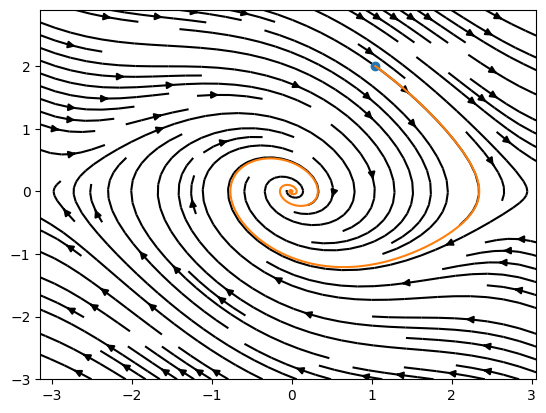

In [128]:
alpha=1
beta=0.5
t_span = [0, 30]
t_array = np.linspace(t_span[0], t_span[1], 1000)
x0 = np.array([np.pi/3, 2])


f_test = pendulum_system(alpha, beta)

x_values, y_values = pl.meshgrid(pl.arange(-np.pi, np.pi, 0.1),
                                     pl.arange(-3, 3, 0.1))

pendulum_deriv_plot_otbiy(x_values, y_values, alpha, beta)
plt.plot(x0[0], x0[1], "o")

result = solve_ivp(f_test, t_span, x0, dense_output=True)
solution = result.sol(t_array)
plt.plot(solution[0, :], solution[1,:])

In [129]:
def poncare_section_calculation(
    function: Callable[[float], float], 
    bracket: List[float], 
    n_iter: int = 0, 
    max_iter: int = 10, 
    epsilon: float = 1e-3, 
    root_points: List[float] = []
) -> float:
    
    if n_iter > max_iter:
        return root_points
    
    root_result = root_scalar(function, method="bisect", bracket=t_span)
    
    if root_result.converged:
        if root_result.root in root_points:
            return root_points
            
        root_points.append(root_result.root)
        bracket_01 = root_result.root -epsilon
        bracket_10 = root_result.root + epsilon
        if bracket_01 > bracket[0]:
            bracket0 = [bracket[0], bracket_01]
            root_points = poncare_section_calculation(function, bracket0, n_iter+1, max_iter, epsilon, root_points)
        if bracket[1] > bracket_10:
            print("he pasado por aquí")
            bracket1 = [bracket_10, bracket[1]]
            breakpoint()
            root_points = poncare_section_calculation(function, bracket1, n_iter+1, max_iter, epsilon, root_points)
    print(root_result.converged)
    return root_points


def poincare_section_grid(function, t_span, n_points=100):

    t_values = np.linspace(t_span[0], t_span[1], n_points)
    t_roots = []
    for i in range(n_points - 1):
        root = None
        try:
            root_result = root_scalar(function, method="bisect", bracket=[t_values[i], t_values[i+1]])
            converged = root_result.converged
            root = root_result.root
        except ValueError:
            converged = False
        if converged:
            t_roots.append(root)
    return np.array(t_roots)
        

In [130]:
def poincare_section_generator(result):

    def init(t):
        return result.sol(t)[0] - result.sol(t)[1]

    return init
    
# root_points = poncare_section_calculation(poincare_section, [5, 7], max_iter=3)
root_points = poincare_section_grid(poincare_section_generator(result), t_span, n_points=100)

root_points

array([ 0.2661214 ,  5.21573314,  8.5822499 , 11.84887014, 15.09807439,
       18.34382222, 21.58853404, 24.83367244, 28.07813164])

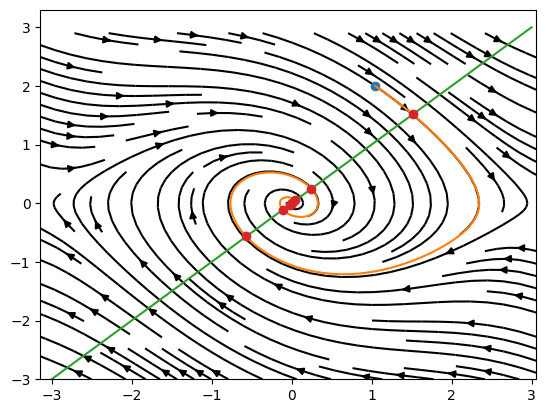

In [131]:
pendulum_deriv_plot_otbiy(x_values, y_values, alpha, beta)
plt.plot(x0[0], x0[1], "o")

result = solve_ivp(f_test, t_span, x0, dense_output=True)
solution = result.sol(t_array)
plt.plot(solution[0, :], solution[1,:])
#plt.hlines(y=0,xmin=-np.pi, xmax=np.pi, color="r")
plt.plot(np.linspace(-3, 3, 2), np.linspace(-3, 3, 2))
ps = result.sol(root_points)
plt.plot(ps[0,:], ps[1,:], "o")

## Resolviendo el sistema para cada subintervalo de tiempo

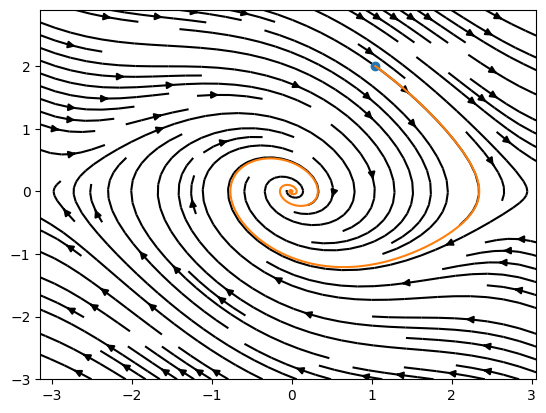

In [132]:
alpha=1
beta=0.5
t_span = [0, 30]
t_array = np.linspace(t_span[0], t_span[1], 1000)
x0 = np.array([np.pi/3, 2])


f_test = pendulum_system(alpha, beta)

x_values, y_values = pl.meshgrid(pl.arange(-np.pi, np.pi, 0.1),
                                     pl.arange(-3, 3, 0.1))

pendulum_deriv_plot_otbiy(x_values, y_values, alpha, beta)
plt.plot(x0[0], x0[1], "o")

result = solve_ivp(f_test, t_span, x0, dense_output=True)
solution = result.sol(t_array)
plt.plot(solution[0, :], solution[1,:])

In [133]:
def poincare_section_grid_ode(function_ode, poincare_section_generator, t_span, x0, n_points = None):
    t_values = None
    if n_points:
        t_values = np.linspace(t_span[0], t_span[1], n_points)
    result_general = solve_ivp(f_test, t_span, x0, t_eval=t_values)
    t_values = result_general.t
    x0_array = result_general.y
    t_roots = []
    for i in range(t_values.size - 1):
        result = solve_ivp(function_ode, [t_values[i], t_values[i+1]], x0_array[:,i], dense_output=True)
        poincare_section = poincare_section_generator(result)
        root = None
        try:
            root_result = root_scalar(poincare_section, method="bisect", bracket=[t_values[i], t_values[i+1]])
            converged = root_result.converged
            root = root_result.root
        except ValueError:
            converged = False
        if converged:
            t_roots.append(root)
    return np.array(t_roots)

In [134]:
root_points_2 = poincare_section_grid_ode(f_test, poincare_section_generator, t_span, x0, 100)

root_points_2

array([ 0.26585721,  5.21586572,  8.58229292, 11.8488378 , 15.09825378,
       18.34356756, 21.58855217, 24.83321228, 28.07840735])

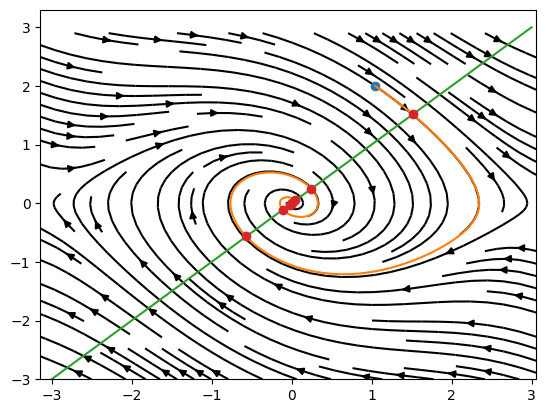

In [135]:
pendulum_deriv_plot_otbiy(x_values, y_values, alpha, beta)
plt.plot(x0[0], x0[1], "o")

result = solve_ivp(f_test, t_span, x0, dense_output=True)
solution = result.sol(t_array)
plt.plot(solution[0, :], solution[1,:])
#plt.hlines(y=0,xmin=-np.pi, xmax=np.pi, color="r")
plt.plot(np.linspace(-3, 3, 2), np.linspace(-3, 3, 2))
ps = result.sol(root_points_2)
plt.plot(ps[0,:], ps[1,:], "o")

In [127]:
np.abs(1 - root_points_2 / root_points).max()

0.0009927476530131596